In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.options.plotting.backend = "plotly"

import plotly.io as pio
pio.templates.default = "none"

plt.style.use('default')
plt.rcParams['axes.grid'] = True
plt.rcParams["figure.figsize"] = (16, 4)
plt.rcParams['figure.dpi'] = 150

### Visualize some data

In [4]:
data_path_1 = r'D:\OneDrive - NTHU\Projects and Papers\ASE_PHM_WireBonding\dataset\8_Nov15_test_crop\DAQ_20220324\cell1_WBR431_20220316_004618_005623_0392k'
data_path_2 = r'D:\OneDrive - NTHU\Projects and Papers\ASE_PHM_WireBonding\dataset\8_Nov15_test_crop\DAQ_20220324\cell1_WBR431_20220316_121229_122234_0884k'

In [5]:
cell1_WBR431_20220316_004618_005623_0392k = os.path.join(data_path_1, os.listdir(data_path_1)[-2])
cell1_WBR431_20220316_121229_122234_0884k = os.path.join(data_path_1, os.listdir(data_path_1)[3])

In [5]:
test_samples = list(np.arange(0, 5))

In [6]:
full_cell1_WBR431_20220316_004618_005623_0392k = []
for idx, csv in enumerate(os.listdir(cell1_WBR431_20220316_004618_005623_0392k)):
    if idx in test_samples:
        full_dir = os.path.join(cell1_WBR431_20220316_004618_005623_0392k, csv)
        full_cell1_WBR431_20220316_004618_005623_0392k.append(pd.read_csv(full_dir, header=None, index_col=None)[[2, 3]])

full_cell1_WBR431_20220316_121229_122234_0884k = []
for idx, csv in enumerate(os.listdir(cell1_WBR431_20220316_121229_122234_0884k)):
    if idx in test_samples:
        full_dir  = os.path.join(cell1_WBR431_20220316_121229_122234_0884k, csv)
        full_cell1_WBR431_20220316_121229_122234_0884k.append(pd.read_csv(full_dir, header=None, index_col=None)[[2, 3]])

In [ ]:
start, end = 0, 50000

fig, ax = plt.subplots(nrows=2, figsize=(16, 6))
ax[0].plot(full_cell1_WBR431_20220316_004618_005623_0392k[0][3][start: end], label='Z-encoder')
ax[0].plot(full_cell1_WBR431_20220316_004618_005623_0392k[0][2][start: end], label='Piezo data')

ax[1].plot(full_cell1_WBR431_20220316_121229_122234_0884k[0][3][start: end], label='Z-encoder')
ax[1].plot(full_cell1_WBR431_20220316_121229_122234_0884k[0][2][start: end ], label='Piezo data')

plt.legend()
plt.show()

---
### Test for hypothesis

In [6]:
start1 = pd.read_csv('Test_004618.csv', header=None, index_col=None)[[2, 3]]
start2 = pd.read_csv('Test_004631.csv', header=None, index_col=None)[[2, 3]]
end1 = pd.read_csv('Test_121229.csv', header=None, index_col=None)[[2, 3]]
end2 = pd.read_csv('Test_121244.csv', header=None, index_col=None)[[2, 3]]

In [4]:
start1_idx = pd.read_csv('start_results_004618.csv').dropna()
start2_idx = pd.read_csv('start_results_004631.csv').dropna()

end1_idx = pd.read_csv('end_results_121229.csv').dropna()
end2_idx = pd.read_csv('end_results_121244.csv').dropna()

In [5]:
def get_crop_index(result_csv):
    crop_index = []
    for idx, row in result_csv.iterrows():
        crop_index.extend(row[1:])

    return crop_index

start1_crop_index = get_crop_index(start1_idx)
start2_crop_index = get_crop_index(start2_idx)
end1_crop_index = get_crop_index(end1_idx)
end2_crop_index = get_crop_index(end2_idx)

Visualize crop index on overall data

In [ ]:
start, end = 0, 20000
fig, ax = plt.subplots(nrows=2, figsize=(16, 6))

ax[0].plot(start1[start: end])
for idx in start1_crop_index:
    if idx > end: break
    ax[0].axvline(idx, linewidth=3.0, c='r')

# ax[1].plot(start2[start: end])
# for idx in start2_crop_index:
#     if idx > end: break
#     ax[1].axvline(idx, linewidth=3.0, c='r')
#
# ax[2].plot(end1[start: end])
# for idx in end1_crop_index:
#     if idx > end: break
#     ax[2].axvline(idx, linewidth=3.0, c='r')

ax[1].plot(end2[start: end])
for idx in end2_crop_index:
    if idx > end: break
    ax[1].axvline(idx, linewidth=3.0, c='r')

plt.show()

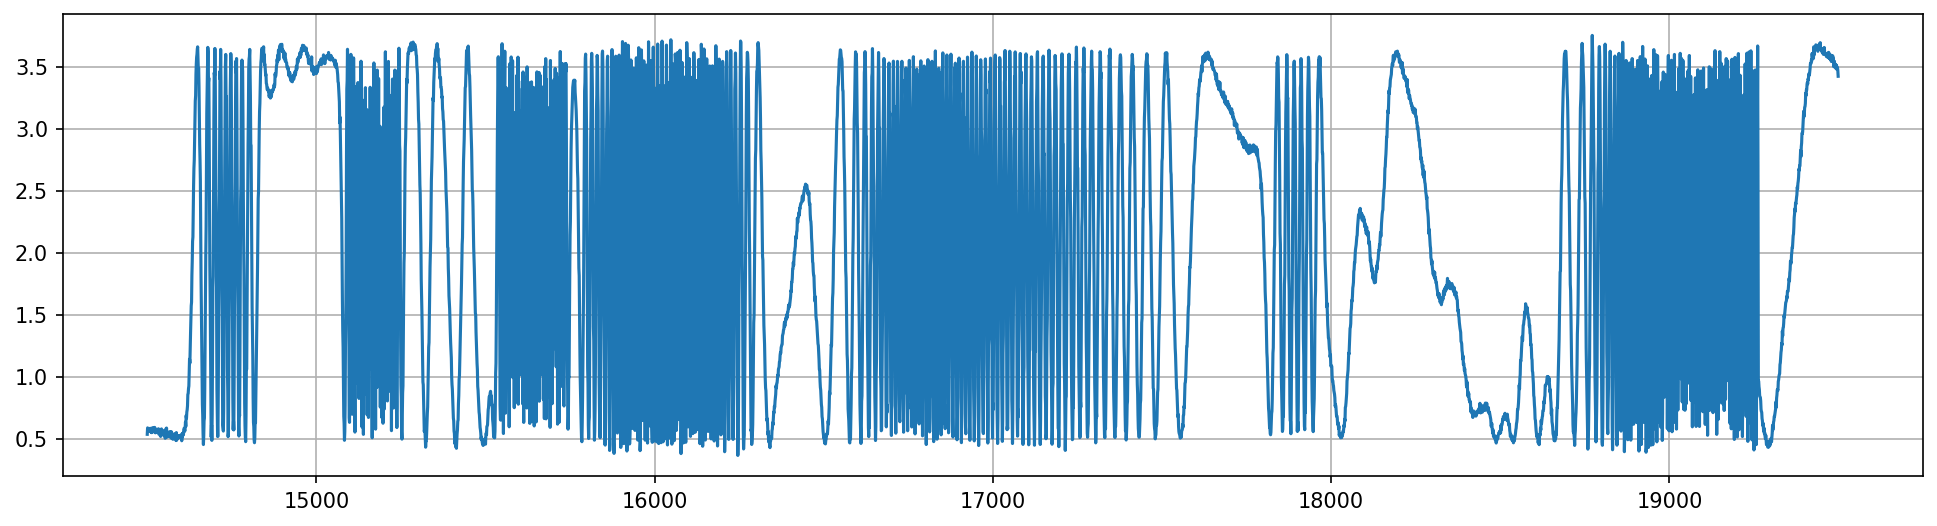

In [12]:
plt.plot(start1[3][14500: 19500])
plt.show()

Extract and compare each working stage

In [6]:
start_working_stage_dict = {
    'start_1st_bond_1': start1_idx[['1st bond start', '1st bond end']],
    'start_1st_bond_2': start2_idx[['1st bond start', '1st bond end']],
    'start_looping_1': start1_idx[['looping start', 'looping end']],
    'start_looping_2': start2_idx[['looping start', 'looping end']],
    'start_2nd_bond_1': start1_idx[['2nd bond start', '2nd bond end']],
    'start_2nd_bond_2': start2_idx[['2nd bond start', '2nd bond end']]
}

end_working_stage_dict = {
    'end_1st_bond_1': end1_idx[['1st bond start', '1st bond end']],
    'end_1st_bond_2': end2_idx[['1st bond start', '1st bond end']],
    'end_looping_1': end1_idx[['looping start', 'looping end']],
    'end_looping_2': end2_idx[['looping start', 'looping end']],
    'end_2nd_bond_1': end1_idx[['2nd bond start', '2nd bond end']],
    'end_2nd_bond_2': end2_idx[['2nd bond start', '2nd bond end']]
}

In [14]:
def get_data(raw_signal, list_index):
    list_intervals = []
    for idx, row in list_index.iterrows():
        list_intervals.append(raw_signal[int(row[0]): int(row[1])][3])

    return list_intervals

start_1st_bond = get_data(start1, start_working_stage_dict['start_1st_bond_1'])
start_looping = get_data(start1, start_working_stage_dict['start_looping_1'])
end_1st_bond = get_data(end1, end_working_stage_dict['end_1st_bond_1'])
end_looping = get_data(end1, end_working_stage_dict['end_looping_1'])